# GeoPandas

- GeoPandas Structure
- Working with GeoDataFrames and GeoSeriesf
- Carrying out project
- Basic spatial queries and attribute construction

In [1]:
import geopandas


/tmp/ipykernel_2579345/1616829109.py:1: DeprecationWarning: Shapely 2.0 is installed, but because PyGEOS is also installed, GeoPandas still uses PyGEOS by default. However, starting with version 0.14, the default will switch to Shapely. To force to use Shapely 2.0 now, you can either uninstall PyGEOS or set the environment variable USE_PYGEOS=0. You can do this before starting the Python process, or in your code before importing geopandas:

import os
os.environ['USE_PYGEOS'] = '0'
import geopandas

In the next release, GeoPandas will switch to using Shapely by default, even if PyGEOS is installed. If you only have PyGEOS installed to get speed-ups, this switch should be smooth. However, if you are using PyGEOS directly (calling PyGEOS functions on geometries from GeoPandas), this will then stop working and you are encouraged to migrate from PyGEOS to Shapely 2.0 (https://shapely.readthedocs.io/en/latest/migration_pygeos.html).
  import geopandas


In [3]:
gdf = geopandas.read_file("./data/shared/covid/gz_2010_us_040_00_500k.json")

ERROR 1: PROJ: proj_create_from_database: Open of /opt/tljh/user/share/proj failed


In [4]:
gdf.head()

,GEO_ID,STATE,NAME,LSAD,CENSUSAREA,geometry
0,0400000US23,23,Maine,,30842.923,"MULTIPOLYGON (((-67.61976 44.51975, -67.61541 ..."
1,0400000US25,25,Massachusetts,,7800.058,"MULTIPOLYGON (((-70.83204 41.60650, -70.82373 ..."
2,0400000US26,26,Michigan,,56538.901,"MULTIPOLYGON (((-88.68443 48.11579, -88.67563 ..."
3,0400000US30,30,Montana,,145545.801,"POLYGON ((-104.05770 44.99743, -104.25015 44.9..."
4,0400000US32,32,Nevada,,109781.180,"POLYGON ((-114.05060 37.00040, -114.04999 36.9..."


In [5]:
gdf.columns.values

array(['GEO_ID', 'STATE', 'NAME', 'LSAD', 'CENSUSAREA', 'geometry'],
      dtype=object)

<AxesSubplot:>

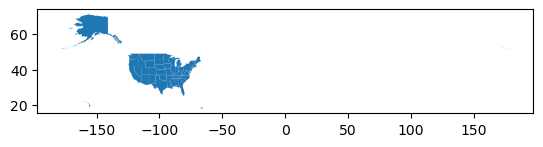

In [6]:
gdf.plot()

In [7]:
type(gdf)

geopandas.geodataframe.GeoDataFrame

## Geometry

In [8]:
gdf.geometry

0     MULTIPOLYGON (((-67.61976 44.51975, -67.61541 ...
1     MULTIPOLYGON (((-70.83204 41.60650, -70.82373 ...
2     MULTIPOLYGON (((-88.68443 48.11579, -88.67563 ...
3     POLYGON ((-104.05770 44.99743, -104.25015 44.9...
4     POLYGON ((-114.05060 37.00040, -114.04999 36.9...
5     POLYGON ((-75.52684 39.65571, -75.52634 39.656...
6     MULTIPOLYGON (((-71.94356 41.28668, -71.92680 ...
7     MULTIPOLYGON (((-82.60288 36.03983, -82.60074 ...
8     MULTIPOLYGON (((-82.81349 41.72347, -82.81049 ...
9     POLYGON ((-75.41504 39.80179, -75.42804 39.809...
10    MULTIPOLYGON (((-71.28157 41.64821, -71.27817 ...
11    POLYGON ((-81.67754 36.58812, -81.68014 36.585...
12    MULTIPOLYGON (((-97.13436 27.89633, -97.13360 ...
13    POLYGON ((-114.05060 37.00040, -114.05175 37.0...
14    MULTIPOLYGON (((-123.09055 49.00198, -123.0353...
15    MULTIPOLYGON (((-90.45525 47.02400, -90.45713 ...
16    MULTIPOLYGON (((-65.58733 18.38199, -65.59122 ...
17    MULTIPOLYGON (((-76.07147 38.20350, -76.04

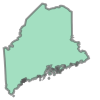

In [9]:
gdf.iloc[0].geometry

In [10]:
gdf.shape

(52, 6)

In [11]:
gdf.head(52)

,GEO_ID,STATE,NAME,LSAD,CENSUSAREA,geometry
0,0400000US23,23,Maine,,30842.923,"MULTIPOLYGON (((-67.61976 44.51975, -67.61541 ..."
1,0400000US25,25,Massachusetts,,7800.058,"MULTIPOLYGON (((-70.83204 41.60650, -70.82373 ..."
2,0400000US26,26,Michigan,,56538.901,"MULTIPOLYGON (((-88.68443 48.11579, -88.67563 ..."
3,0400000US30,30,Montana,,145545.801,"POLYGON ((-104.05770 44.99743, -104.25015 44.9..."
4,0400000US32,32,Nevada,,109781.180,"POLYGON ((-114.05060 37.00040, -114.04999 36.9..."
5,0400000US34,34,New Jersey,,7354.220,"POLYGON ((-75.52684 39.65571, -75.52634 39.656..."
6,0400000US36,36,New York,,47126.399,"MULTIPOLYGON (((-71.94356 41.28668, -71.92680 ..."
7,0400000US37,37,North Carolina,,48617.905,"MULTIPOLYGON (((-82.60288 36.03983, -82.60074 ..."
8,0400000US39,39,Ohio,,40860.694,"MULTIPOLYGON (((-82.81349 41.72347, -82.81049 ..."
9,0400000US42,42,Pennsylvania,,44742.703,"POLYGON ((-75.41504 39.80179, -75.42804 39.809..."


In [12]:
drop_states = ['15', '02', '72'] # HA, AK, PR

<AxesSubplot:>

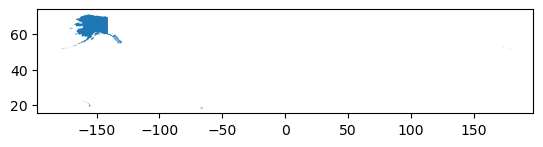

In [14]:
gdf[gdf.STATE.isin(drop_states)].plot()

<AxesSubplot:>

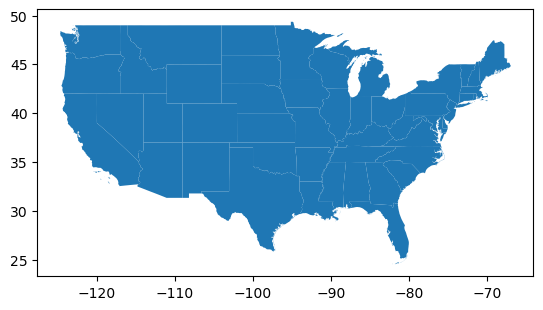

In [15]:
gdf[~gdf.STATE.isin(drop_states)].plot()

In [17]:
gdf = gdf[~gdf.STATE.isin(drop_states)]

In [18]:
gdf.shape

(49, 6)

## Centroids and geometry

In [19]:
gdf.centroid

/tmp/ipykernel_2579345/2017122361.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf.centroid


0      POINT (-69.22532 45.36948)
1      POINT (-71.79546 42.25229)
2      POINT (-85.43751 44.35323)
3     POINT (-109.64507 47.03355)
4     POINT (-116.65540 39.35646)
5      POINT (-74.66099 40.18393)
6      POINT (-75.50198 42.93930)
7      POINT (-79.35542 35.53980)
8      POINT (-82.79018 40.29333)
9      POINT (-77.79953 40.87382)
10     POINT (-71.55250 41.67619)
11     POINT (-86.34329 35.84299)
12     POINT (-99.35528 31.49051)
13    POINT (-111.67820 39.32379)
14    POINT (-120.45017 47.38108)
15     POINT (-90.01113 44.63829)
17     POINT (-76.76446 39.03041)
18     POINT (-86.82843 32.78969)
20    POINT (-111.66458 34.29326)
21     POINT (-92.43928 34.89974)
22    POINT (-119.61077 37.24612)
23    POINT (-105.54782 38.99855)
24     POINT (-72.72576 41.62055)
25     POINT (-75.50018 38.99178)
26     POINT (-77.01630 38.90473)
27     POINT (-82.50162 28.64096)
28     POINT (-83.44606 32.64908)
30    POINT (-114.65933 44.38912)
31     POINT (-89.19828 40.06474)
32     POINT (

In [20]:
gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

<AxesSubplot:>

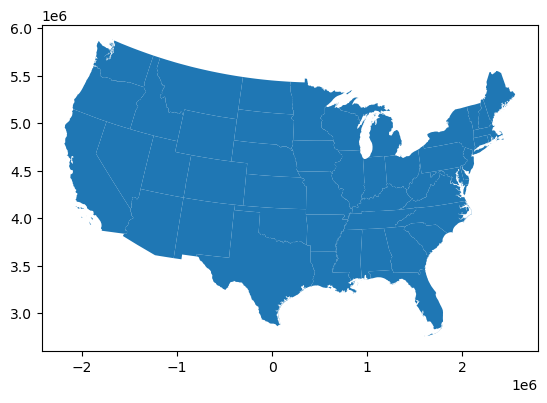

In [21]:
gdf.to_crs(gdf.estimate_utm_crs()).plot()

In [22]:
gdf = gdf.to_crs(gdf.estimate_utm_crs())

In [23]:
gdf.centroid

0      POINT (2359392.452 5305169.775)
1      POINT (2253174.905 4901469.336)
2      POINT (1108124.800 4935453.192)
3      POINT (-765955.563 5348067.290)
4     POINT (-1548246.254 4630302.336)
5      POINT (2065285.016 4612318.097)
6      POINT (1930049.196 4904992.641)
7      POINT (1742974.165 4021487.098)
8      POINT (1368634.294 4510266.503)
9      POINT (1784134.621 4638257.315)
10     POINT (2289313.142 4842131.086)
11     POINT (1102080.849 3988935.477)
12     POINT (-103892.519 3500028.226)
13    POINT (-1115997.209 4520861.031)
14    POINT (-1565541.918 5625943.989)
15      POINT (738620.228 4945674.977)
17     POINT (1910429.070 4447760.368)
18     POINT (1078425.172 3643488.570)
20    POINT (-1230212.721 3954699.221)
21      POINT (550933.347 3861451.888)
22    POINT (-1870826.275 4466915.330)
23     POINT (-590190.342 4392344.096)
24     POINT (2192677.610 4811150.640)
25     POINT (2020359.310 4464239.060)
26     POINT (1889584.643 4429716.358)
27     POINT (1535090.511

In [24]:
gdf.crs

<Projected CRS: EPSG:32615>
Name: WGS 84 / UTM zone 15N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 96°W and 90°W, northern hemisphere between equator and 84°N, onshore and offshore. Canada - Manitoba; Nunavut; Ontario. Ecuador -Galapagos. Guatemala. Mexico. United States (USA).
- bounds: (-96.0, 0.0, -90.0, 84.0)
Coordinate Operation:
- name: UTM zone 15N
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [25]:
gdf['centroid'] = gdf.centroid

<AxesSubplot:>

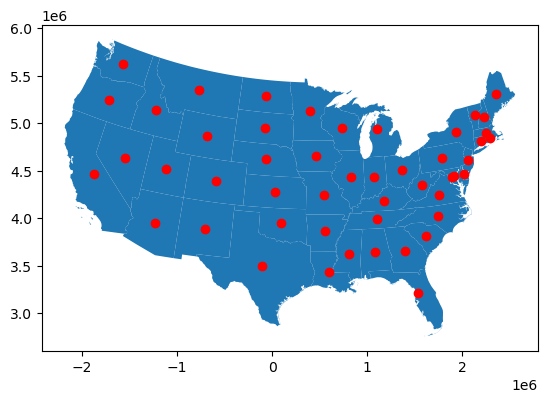

In [26]:
base = gdf.plot()
gdf.centroid.plot(ax=base, color='r')